Digit Recoginization ML Model using tenserflow

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [19]:
mnist = tf.keras.datasets.mnist    ##loding digit dataset 

Spliting data into test and train

In [20]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [21]:
print('x_train shape:',x_train.shape,'x_train dtype:',x_train.dtype,'\n y_train shape:',y_train.shape,'y_train dtype:',y_train.dtype)
print('x_test shape:',x_test.shape,'x_test dtype:',x_test.dtype,'\n y_test shape:',y_test.shape,'y_test dtype:',y_test.dtype)

x_train shape: (60000, 28, 28) x_train dtype: uint8 
 y_train shape: (60000,) y_train dtype: uint8
x_test shape: (10000, 28, 28) x_test dtype: uint8 
 y_test shape: (10000,) y_test dtype: uint8


In [22]:
print(x_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

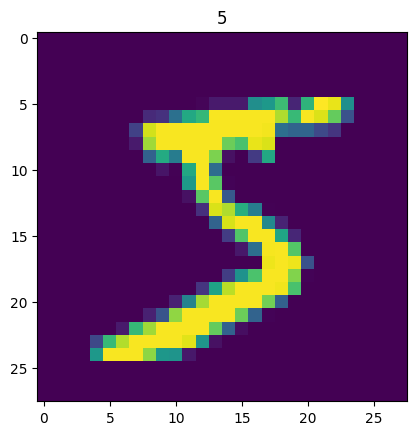

In [23]:
plt.imshow(x_train[0])
plt.title(y_train[0])
plt.show()

Preprocessing

In [24]:
x_train = tf.keras.utils.normalize(x_train,axis=1)
x_test = tf.keras.utils.normalize(x_test,axis=1)
x_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

Creating Model

In [25]:
model = tf.keras.models.Sequential() 

In [26]:
model.add(tf.keras.layers.Flatten(input_shape = (28,28) ) )
model.add(tf.keras.layers.Dense(16, activation = 'relu') )
model.add(tf.keras.layers.Dropout(0.2) )
model.add(tf.keras.layers.Dense(10, activation = 'softmax'))

C:\Users\karan\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [27]:
model.compile(optimizer ='adam', loss ='SparseCategoricalCrossentropy', metrics =['accuracy'])

In [ ]:
hist = model.fit(x_train, y_train, epochs =1000, validation_split =0.20, batch_size = 1000)

Epoch 1/1000
48/48 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.2520 - loss: 2.1645 - val_accuracy: 0.7015 - val_loss: 1.5542
Epoch 2/1000
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6122 - loss: 1.4881 - val_accuracy: 0.8134 - val_loss: 0.9999
Epoch 3/1000
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7047 - loss: 1.0857 - val_accuracy: 0.8514 - val_loss: 0.7216
Epoch 4/1000
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7440 - loss: 0.8763 - val_accuracy: 0.8726 - val_loss: 0.5664
Epoch 5/1000
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7765 - loss: 0.7439 - val_accuracy: 0.8845 - val_loss: 0.4856
Epoch 6/1000
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8040 - loss: 0.6576 - val_accuracy: 0.8936 - val_loss: 0.4363
Epoch 7/1000
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8152 - loss: 0.6124 - val_accuracy: 0.8977 - val_loss: 0.4026
Epoch 8/1000
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8273 - loss: 0.5751 - val_accuracy: 0.

In [ ]:
y_prob = model.predict(x_test)

In [ ]:
y_pred = y_prob.argmax(axis=1)

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred))

In [ ]:
test_loss, test_acc = model.evaluate(x_test,y_test)
print('accuracy :',test_acc)
print('loss :',test_loss)

In [ ]:
plt.plot(hist.history['loss'] , label = 'loss')
plt.plot(hist.history['val_loss'], label = 'val_loss')
plt.title('LOSS')
plt.legend()
plt.show()

In [ ]:
plt.plot(hist.history['accuracy'], label = 'accuracy')
plt.plot(hist.history['val_accuracy'], label = 'val_accuracy')
plt.title('ACCURACY')
plt.legend()
plt.show()